In [9]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
dir <- "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees"
# load(file.path(dir, "treeCons.RData"))
# load(file.path(dir, "treeCons0.RData"))
# load(file.path(dir, "treeCor.RData"))
# load(file.path(dir, "treeMeanInf0.RData"))
# load(file.path(dir, "treeThr.RData"))
# load(file.path(dir, "yAggConsNS.RData"))
# load(file.path(dir, "yAggConsNS0.RData"))
# load(file.path(dir, "yAggCorNS.RData"))
# load(file.path(dir, "yAggMeanInfNS0.RData"))
load(file.path(dir, "yAggThrNS.RData"))
load(file.path(dir, "gene_summ.RData"))

In [91]:
### Consensus
depth <- node.depth(treeCons,2)
modDep <- depth
modDep[modDep > 5] = 5
dfInfRV <- data.frame(MIRV = mcols(yAggConsNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="ConsInd")

In [92]:
### Consensus0
depth <- node.depth(treeCons0,2)
modDep <- depth
modDep[modDep > 5] = 5
dfInfRV <- rbind(dfInfRV, data.frame(MIRV = mcols(yAggConsNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="Cons"))

In [93]:
### MeanInf0
depth <- node.depth(treeMeanInf0,2)
modDep <- depth
modDep[modDep > 5] = 5
dfInfRV <- rbind(dfInfRV, data.frame(MIRV = mcols(yAggMeanInfNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="Mean"))

In [94]:
### Anti-Correlation
depth <- node.depth(treeCor,2)
modDep <- depth
modDep[modDep > 5] = 5
dfInfRV <- rbind(dfInfRV,data.frame(MIRV = mcols(yAggCorNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="AC"))

In [95]:
### Threshold
depth <- node.depth(treeThr,2)
modDep <- depth
modDep[modDep > 5] = 5
dfInfRV <- rbind(dfInfRV, data.frame(MIRV = mcols(yAggThrNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="ConsRedInd"))

In [23]:
n <- 4
ntxps <- length(treeThr$tip)
ngenes <- nrow(gse)
dfIT <- dfInfRV
dfIT$type <- factor(dfIT$type)
dfIT <- rbind(dfIT, data.frame(MIRV = rep(mcols(yAggThrNS)[["meanInfRV"]][1:ntxps], n), depth = rep(0, ntxps*n), 
                               modDep = rep(1+1:n, each=ntxps), type="Txp"))
dfIT <- rbind(dfIT, data.frame(MIRV = rep(mcols(gse)[["meanInfRV"]][1:ngenes],n), depth = rep(0, ngenes*n), 
                               modDep = rep(1+1:n, each=ngenes), type="Gene"))

In [24]:
colnames(dfIT)[4] <- c("Type")
dfIT$modDep[dfIT$modDep >= 5]=5
dfIT$Type <- as.factor(dfIT$Type)
levels(dfIT$Type)
nn <- c("2"="Depth=2",
       "3"="Depth=3",
       "4"="Depth=4",
       "5"="Depth>=5")
nn
levels(dfIT$Type) <- c("AC", "ConsFilt", "Cons", "Mean", "ConsFiltES", "Txp", "Gene")
dfIT$Type <- factor(dfIT$Type, levels = c("AC", "Cons", "ConsFilt", "ConsFiltES", "Mean", "Txp", "Gene"))
dfSumm <- dfIT %>%  filter(depth!=1) %>% 
        group_by(Type, modDep) %>% 
        summarise(n=n(), med = median(MIRV), max = max(log2(MIRV))+1)
save(dfIT, file=file.path(dir,"dfIT.RData"))

[1] "Anti-Correlation" "Consensus"        "Consensus0"       "MeanInf0"        
[5] "Thr"              "Txp"              "Gene"

2          3          4          5 
 "Depth=2"  "Depth=3"  "Depth=4" "Depth>=5"

`summarise()` has grouped output by 'Type'. You can override using the `.groups` argument.


Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"


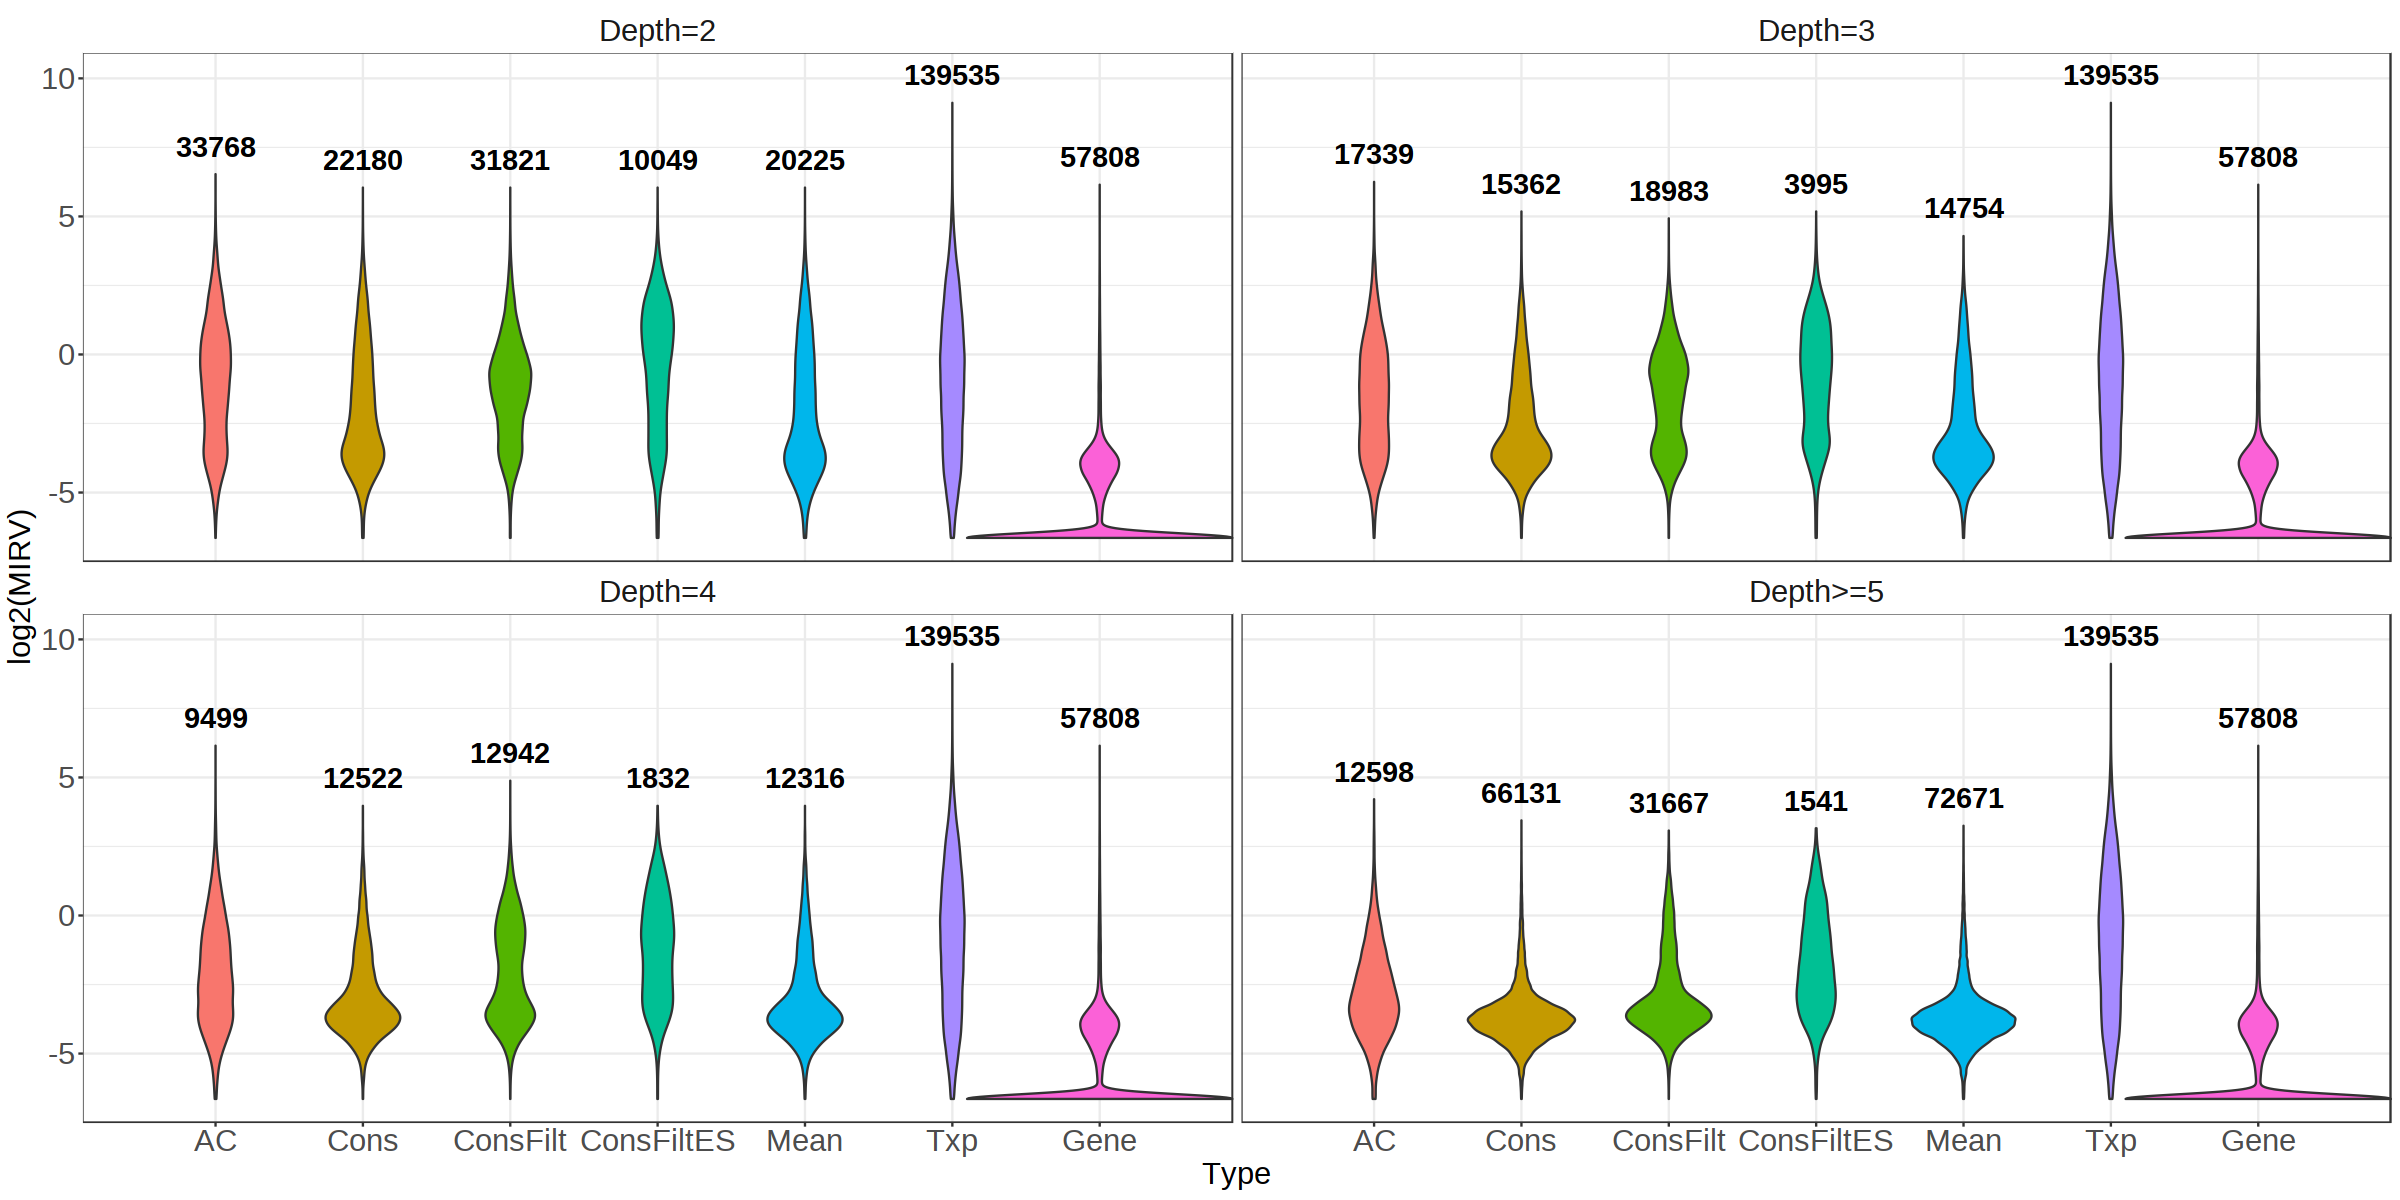

In [25]:
options(repr.plot.width=20, repr.plot.height=10)
size <- 18
dfIT %>% filter(depth!=1) %>% ggplot(aes(x=Type, y=log2(MIRV), fill=Type)) + 
    geom_violin(width=1.8) + 
    facet_wrap(~modDep, labeller = labeller(modDep = nn)) + 
    theme_bw() +
    theme(text = element_text(size = size), legend.position = "none",
          axis.text = element_text(size = size),
          strip.text = element_text(size=size),
          strip.background = element_rect(fill = "white", color = "white")) +
    geom_text(data=dfSumm ,aes(x = Type, y = max, label=n), color="black", fontface = 2, size = 6)

Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"


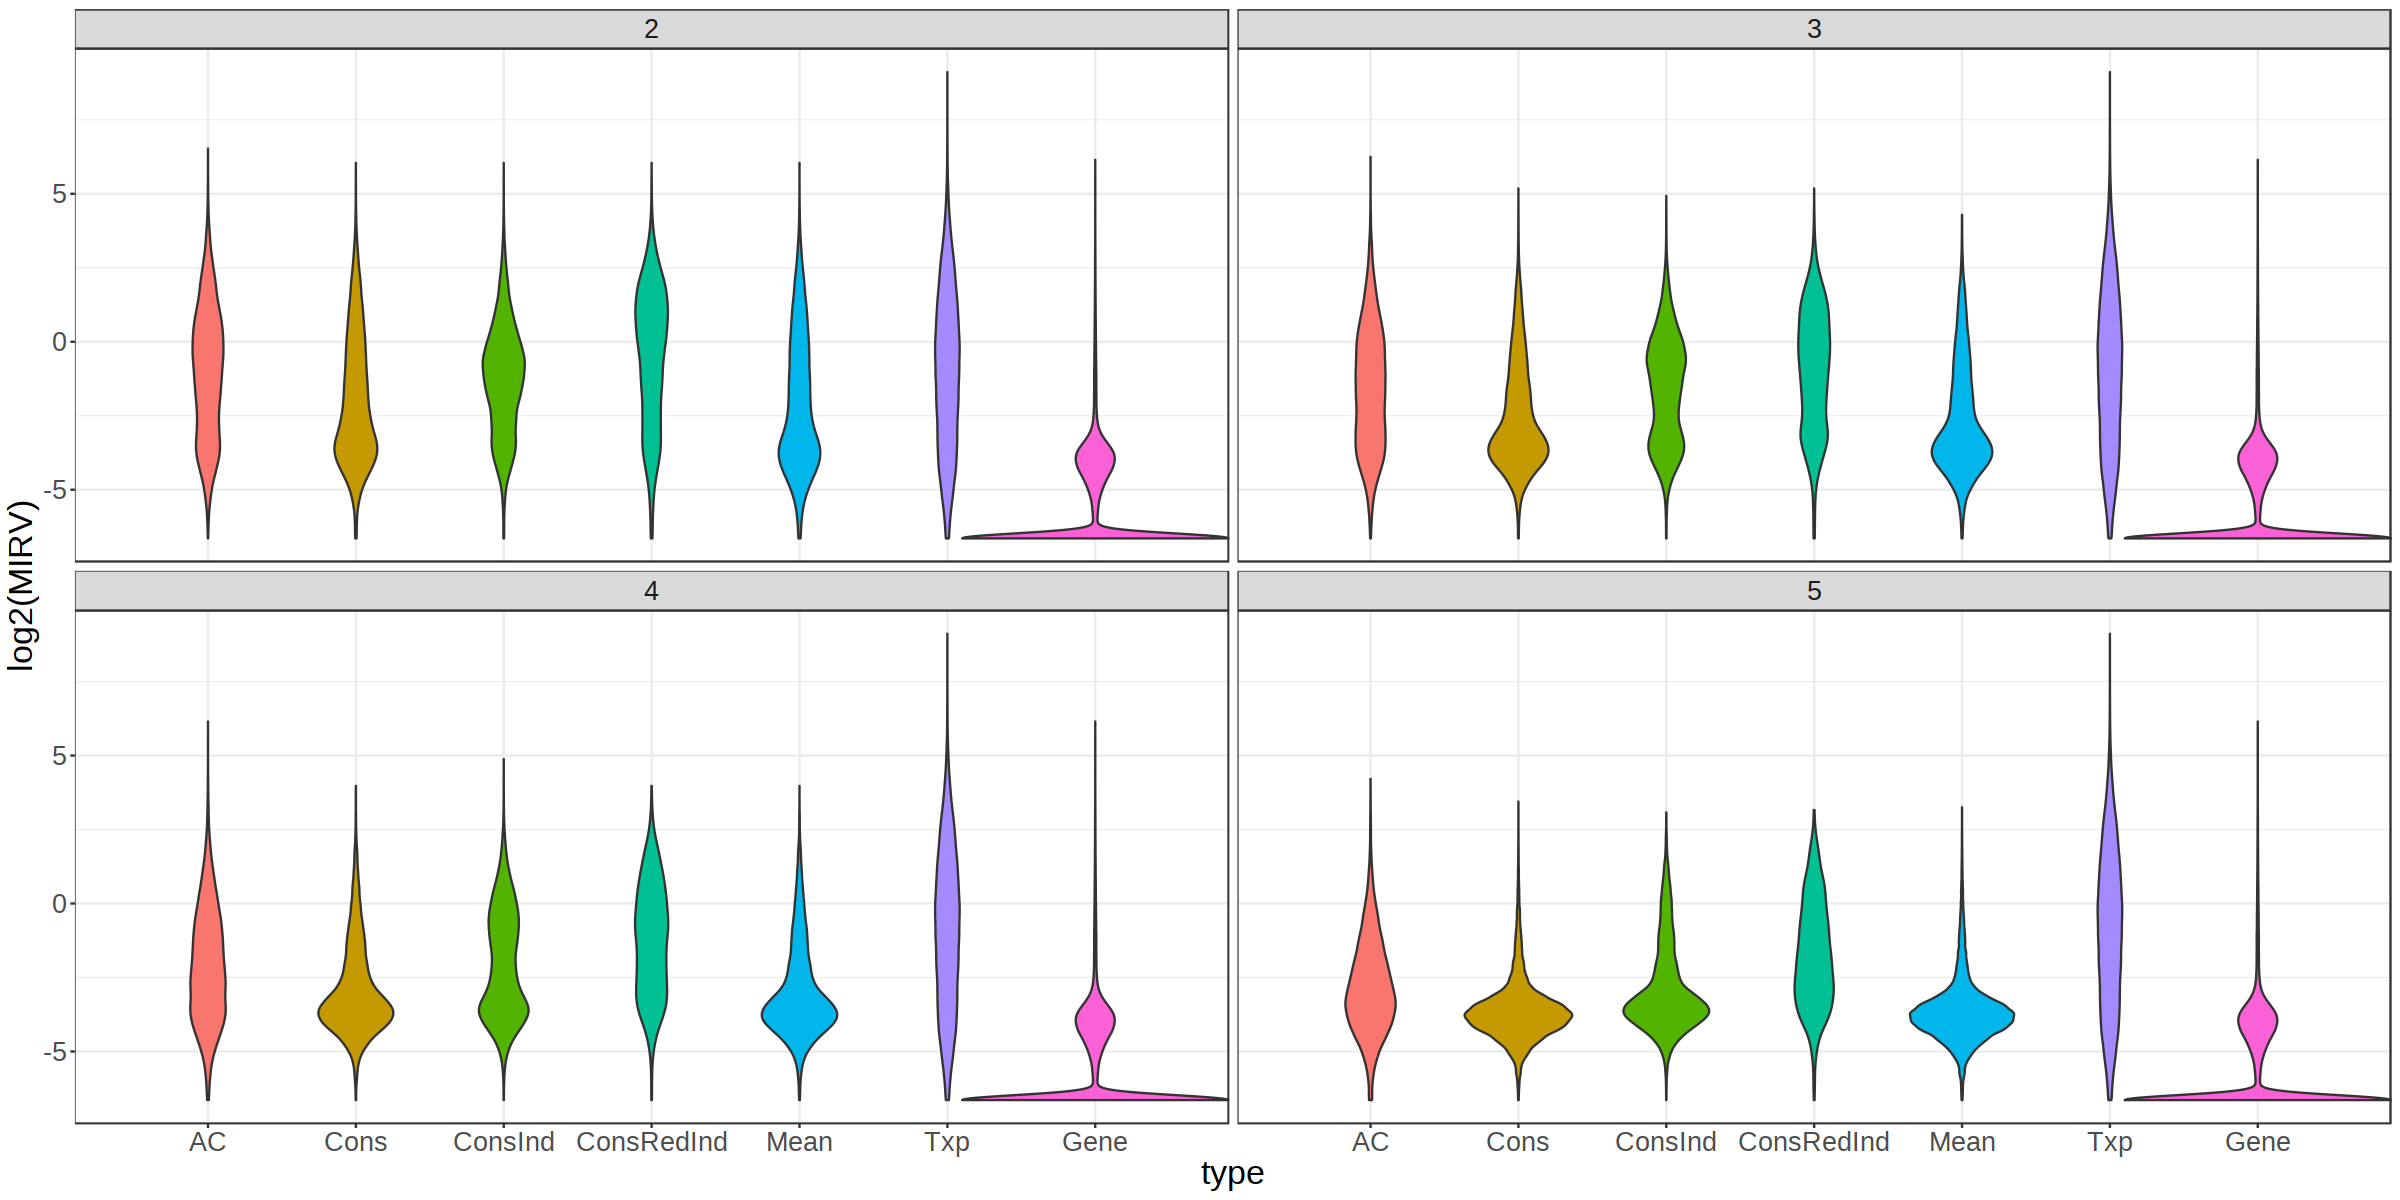

In [102]:
options(repr.plot.width=20, repr.plot.height=10)
dfIT %>% filter(depth!=1) %>% ggplot(aes(x=type, y=log2(MIRV), fill=type)) + 
    geom_violin(width=1.8) + 
    facet_wrap(vars(modDep)) + 
    theme_bw() +
    theme(text = element_text(size = 20), legend.position = "none")

In [7]:
library(xtable)
dfMed <- reshape::cast(dfIT %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep,
              value="MIRV", fun.aggregate = median)
print(xtable(dfMed))

% latex table generated in R 4.1.1 by xtable 1.8-4 package
% Thu Sep  1 21:13:52 2022
\begin{table}[ht]
\centering
\begin{tabular}{rlrrrr}
  \hline
 & type & 2 & 3 & 4 & 5 \\ 
  \hline
1 & AC & 0.52 & 0.32 & 0.21 & 0.12 \\ 
  2 & Cons & 0.19 & 0.12 & 0.10 & 0.07 \\ 
  3 & ConsInd & 0.44 & 0.35 & 0.19 & 0.10 \\ 
  4 & ConsRedInd & 0.89 & 0.56 & 0.42 & 0.26 \\ 
  5 & Mean & 0.17 & 0.11 & 0.09 & 0.07 \\ 
  6 & Txp & 0.52 & 0.52 & 0.52 & 0.52 \\ 
  7 & Gene & 0.01 & 0.01 & 0.01 & 0.01 \\ 
   \hline
\end{tabular}
\end{table}


#### Reduction in infRV

In [25]:
### Consensus
innNodes <- length(treeCons$tip)+1:treeCons$Nnode
childNodes <- Descendants(treeCons, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- data.frame(red = c(rep(1000,length(treeCons$tip)), redInfRV), type="Consensus")
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [26]:
### Consensus0
innNodes <- length(treeCons0$tip)+1:treeCons0$Nnode
childNodes <- Descendants(treeCons0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons0$tip)), redInfRV), type="Consensus0"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [27]:
### Anti-Correlation
innNodes <- length(treeCor$tip)+1:treeCor$Nnode
childNodes <- Descendants(treeCor, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggCorNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggCorNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCor$tip)), redInfRV), type="Anti-Correlation"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [28]:
### Mean Inf 0 Thr
innNodes <- length(treeMeanInf0$tip)+1:treeMeanInf0$Nnode
childNodes <- Descendants(treeMeanInf0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMeanInf0$tip)), redInfRV), type="MeanInf0"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [29]:
### Threshold
innNodes <- length(treeThr$tip)+1:treeThr$Nnode
childNodes <- Descendants(treeThr, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggThrNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggThrNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeThr$tip)), redInfRV), type="Cons_Thr"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [30]:
dfInfRV <- cbind(dfInfRV, redInfRV = dfRedInf$red)
save(dfInfRV, file = file.path(dir, "dfInfRV.RData"))

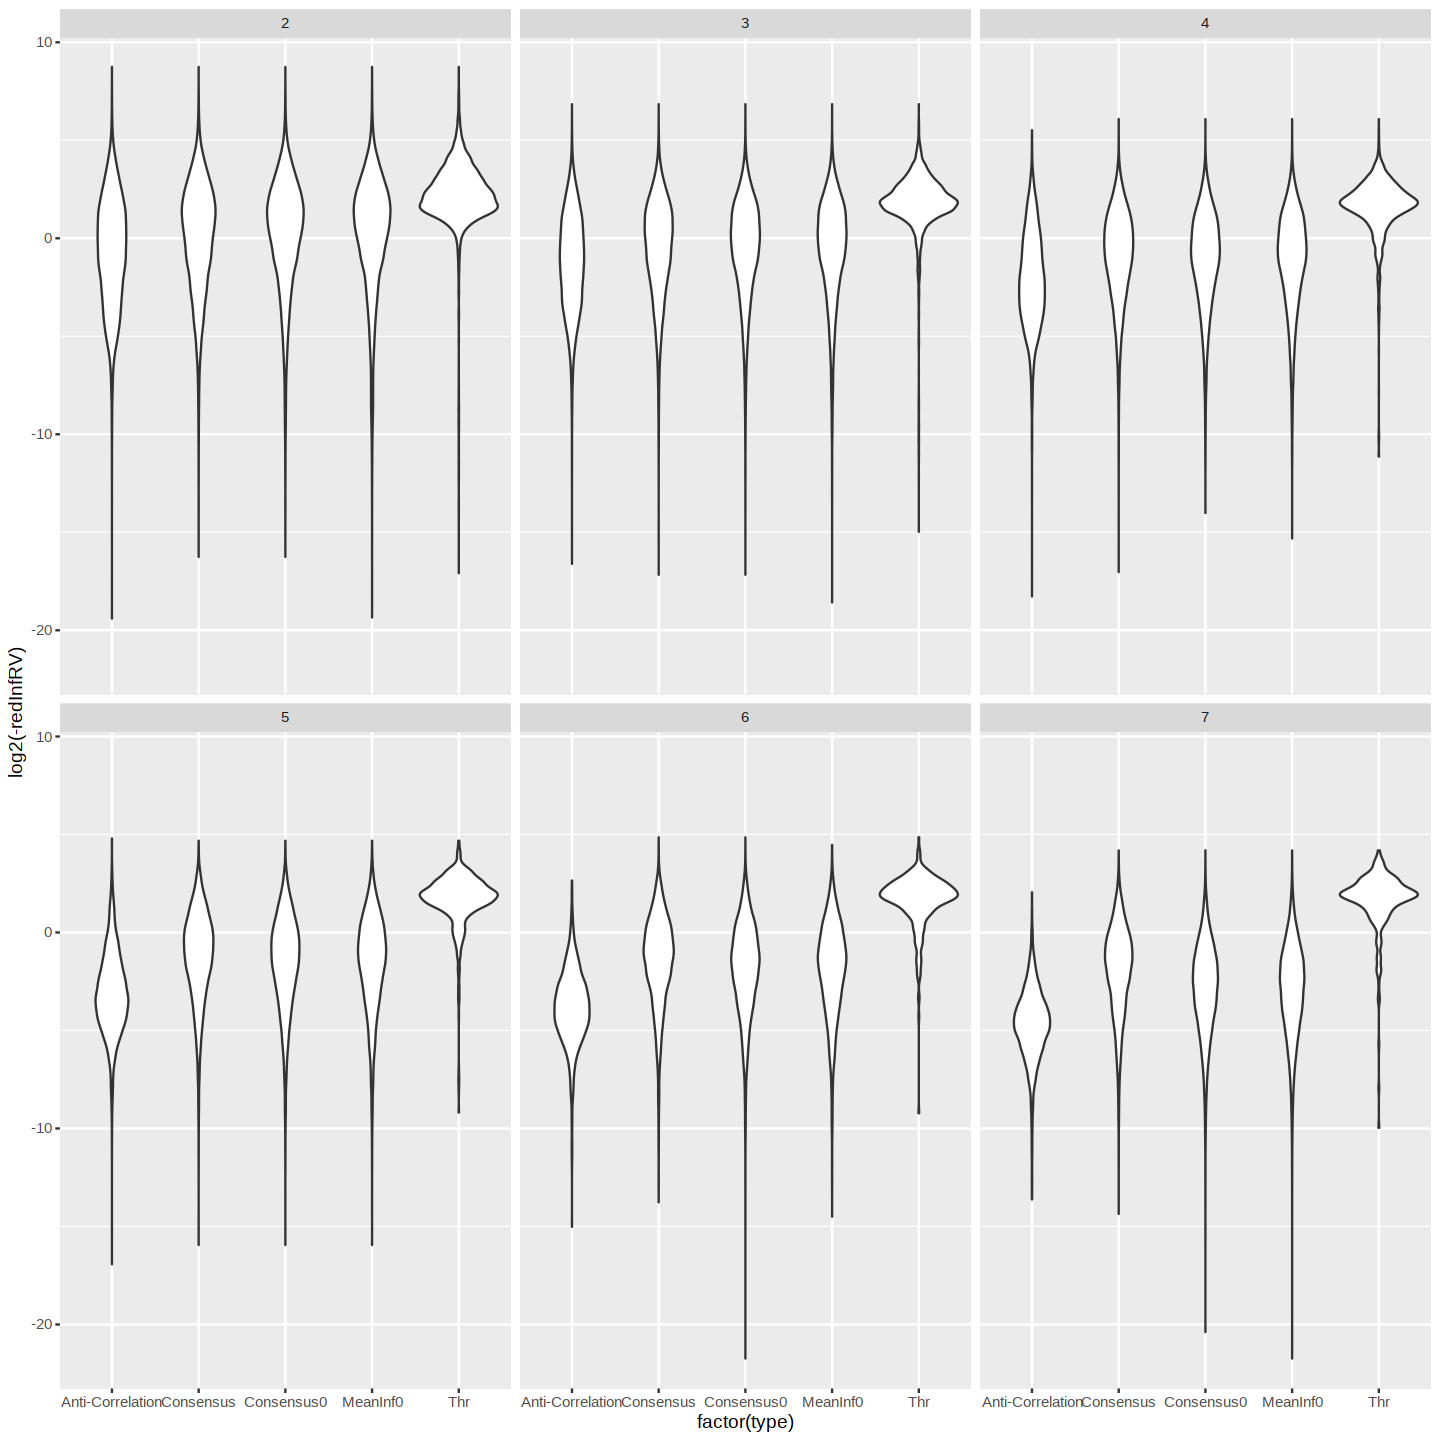

In [31]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% ggplot(aes(x=factor(type), y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))

In [32]:
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, length)
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, median, value="redInfRV")
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, min, value="redInfRV")

Using redInfRV as value column.  Use the value argument to cast to override this choice



,type,2,3,4,5,6,7
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anti-Correlation,26984,14797,8334,4725,2648,3196
2,Consensus,20282,13500,10129,7731,5742,14127
3,Consensus0,19272,13992,11376,9519,7922,37794
4,MeanInf0,18716,13802,11406,9629,8082,43602
5,Thr,9392,3875,1773,788,372,330


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-0.6868231,-0.4469258,-0.2187905,-0.1061963,-0.07143163,-0.04031071
2,Consensus,-1.3126900,-0.8396974,-0.6263183,-0.5041868,-0.43365720,-0.31702108
3,Consensus0,-1.5347964,-0.8527537,-0.5605242,-0.4076458,-0.31674440,-0.15183731
4,MeanInf0,-1.6022062,-0.8595844,-0.5640695,-0.4052776,-0.31792195,-0.14492117
5,Thr,-4.5397838,-3.7258645,-3.5010631,-3.6716931,-3.73111896,-3.79648596


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-428.1413,-114.804,-45.66035,-27.82786,-6.279336,-4.142366
2,Consensus,-428.1413,-114.804,-67.65385,-25.68028,-28.981469,-18.204404
3,Consensus0,-428.1413,-114.804,-67.65385,-25.68028,-28.981469,-18.321093
4,MeanInf0,-428.1413,-114.804,-67.65385,-25.68028,-22.206132,-18.204404
5,Thr,-428.1413,-114.804,-67.65385,-25.68028,-28.981469,-18.204404


In [2]:
load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [3]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFilt", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Cons", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="AC", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Mean", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFiltES", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 5,"depth"]=5

In [72]:
pL <- list()
for(t in seq(2,5)) {
    dd <- dfNGenes %>% filter(depth==t)
    dd2 <- dfNGenes %>% filter(nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=log2(nGenes), fill = Type, colour = Type)) + 
    geom_density(position = "dodge", alpha=0.1) + 
    facet_wrap(vars(depth)) +
    theme_bw() +
    theme(text = element_text(size = 20))
}


[1] 0
[1] 0
[1] 0
[1] 717


Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"
Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"
Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"
Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"
Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"


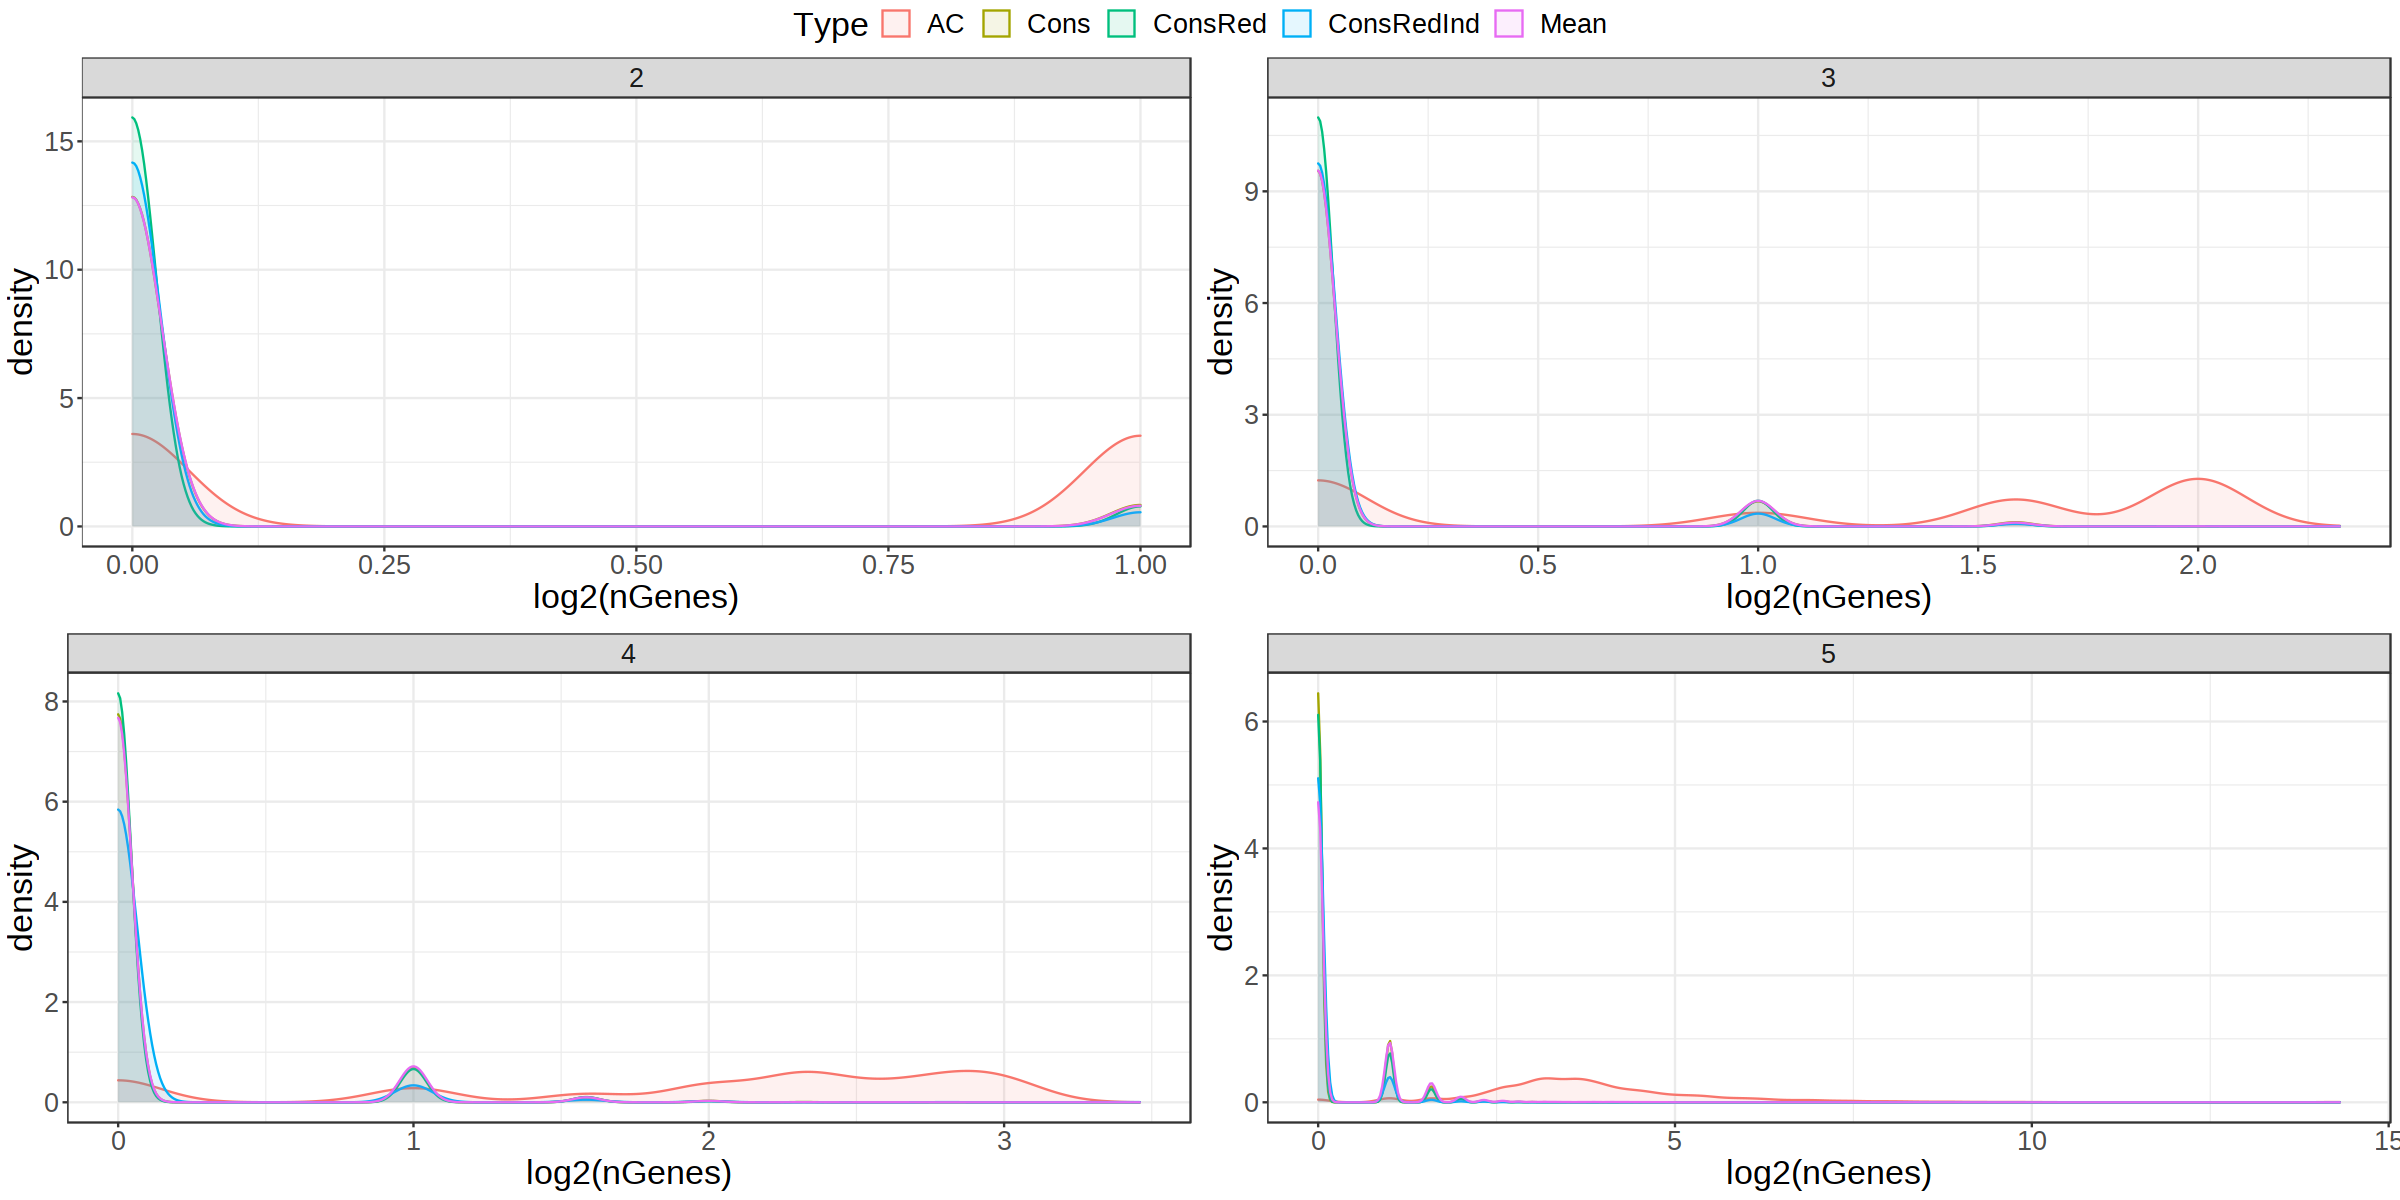

In [73]:
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

In [5]:
pL <- list()
bWs <- c(0.08,0.15,0.25)
for(t in seq(2,5)) {
    dd <- dfNGenes %>% filter(depth==t)
    if(t <= 4) {
        pL[[t-1]] <- ggplot(dd, aes(x=nGenes, fill = Type, colour = Type)) + 
        geom_histogram(position = "dodge", alpha=0.5, binwidth=bWs[t-1]) + 
#         geom_histogram(position = "dodge", binwidth = 0.2) + 
        scale_y_continuous(trans='log10', expand = c(0, 0)) +
#         ylim(c(0,15000)) +
        scale_x_continuous(trans='log2', expand = c(0, 0)) +
#         facet_wrap(vars(depth)) +
        theme_bw() +
        theme(text = element_text(size = 20)) +
        xlab("Number of Genes") +
#         ylab("Number of Nodes") +
#         ylim(0,15000)
    }
    else {
            bins <- c(1,2,4,10,100,500,1000,12000)
            dfN <- data.frame(Type = c(), nodes= c(), nGenes = c())
            for(j in seq(bins)) {
                start <- ifelse(j==1,0,bins[j-1])
                end <- bins[j]
                print(dim(dfN))
                print(j)
                dfT <- dd %>% filter(nGenes > start & nGenes <= end) %>% group_by(Type) %>% summarize(nodes=n())
                miss <- setdiff(dfNGenes$Type, dfT$Type)
                if(length(miss) > 0)
                    dfT <- rbind(dfT, data.frame(Type=miss, nodes=1))
                dfN <- rbind(dfN, cbind(dfT, nGenes = rep(bins[j],5)))
           }
            pL[[t-1]] <- ggplot(dfN, aes(x=nGenes, y=nodes, fill=Type)) + 
                    geom_bar(stat="identity", position="dodge", width = 0.8, alpha=0.7) +
                    scale_y_continuous(trans='log10') +
                    scale_x_continuous(trans='log2') +
                    theme_bw() +
                    theme(text = element_text(size = 20)) +
                    xlab("Number of Genes") +
                    ylab("Number of Nodes")
                    
    }
    
}


ERROR: Error in parse(text = x, srcfile = src): <text>:18:5: unexpected '}'
17: #         ylim(0,15000)
18:     }
        ^


In [2]:
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

ERROR: Error in ggarrange(plotlist = pL, common.legend = T): could not find function "ggarrange"


In [81]:
head(dfNGenes %>% filter(depth==2))

,Type,nGenes,depth
,<chr>,<int>,<dbl>
1,ConsFilt,1,2
2,ConsFilt,1,2
3,ConsFilt,1,2
4,ConsFilt,1,2
5,ConsFilt,1,2
6,ConsFilt,1,2


In [64]:
pL <- list()
for(t in seq(2,5)) {
    dd <- dfNGenes %>% filter(nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(y=Type, x=log2(nGenes), fill = Type)) + 
    geom_violin() + 
    facet_wrap(vars(depth)) +
    theme_bw() +
    theme(text = element_text(size = 20))
}


[1] 0
[1] 0
[1] 0
[1] 717


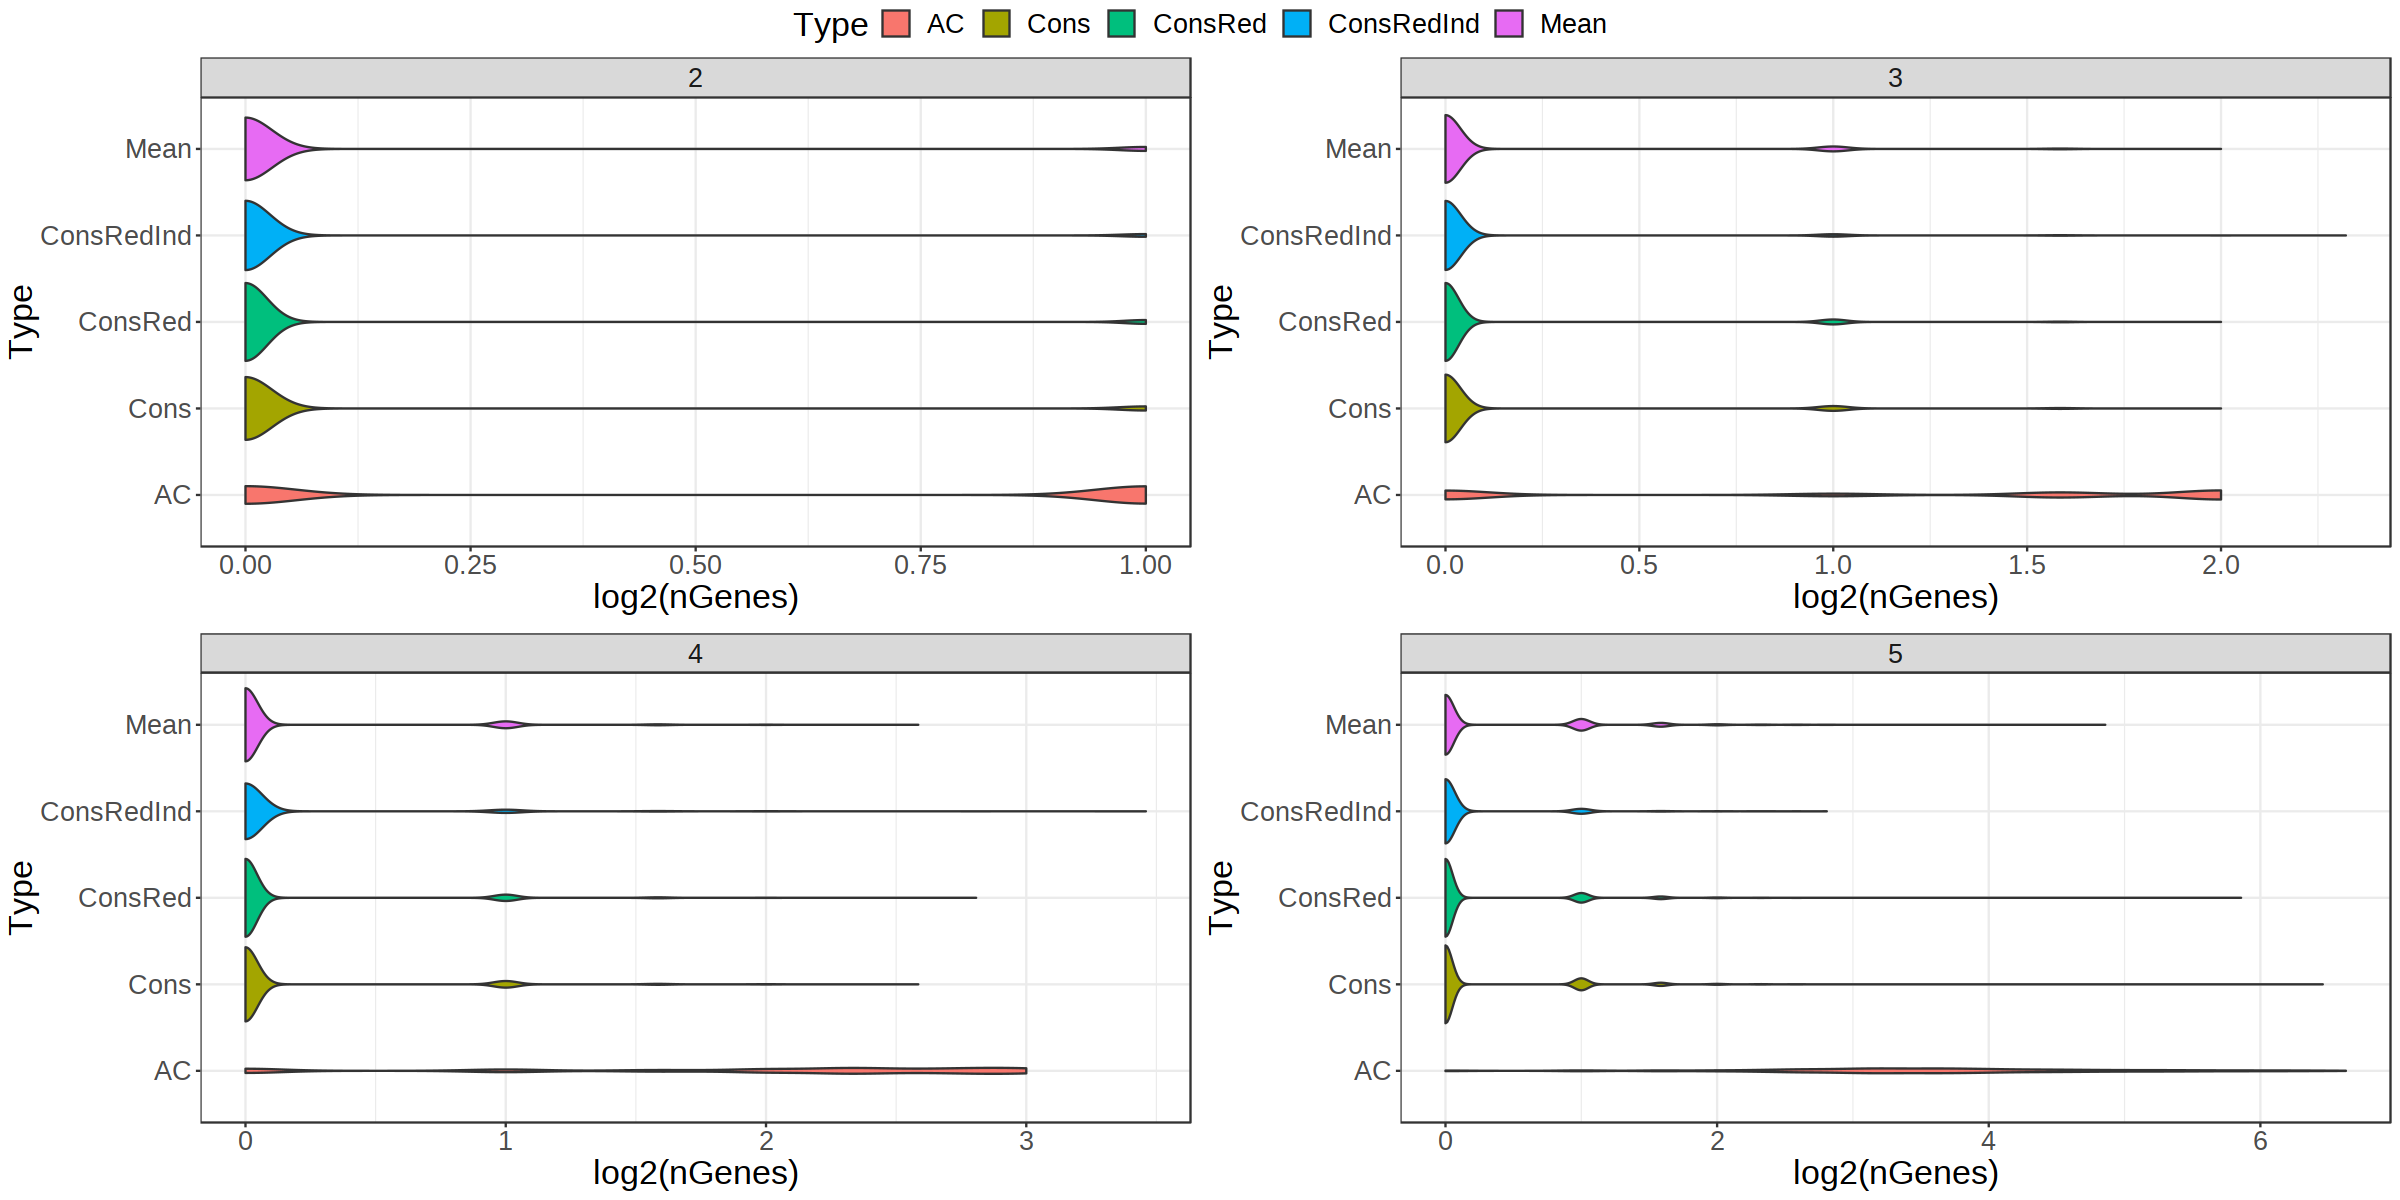

In [65]:
options(repr.plot.width=20, repr.plot.height=10)
ggarrange(plotlist = pL, common.legend = T)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 717



    1     2     3     4     5     6     7     8     9    10    11    12    13 
24730 19775  4347  7624  2330  1626  1929  2087   849   654   550   595   568 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  417   399   359   236   233   193   192   167   160   152   133   127   118 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   89    76    83    80    64    63    57    65    64    53    54    46    64 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   44    43    49    38    56    39    40    30    17    27    29    26    24 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
   20    18    26    18    27    21    15    30    26    12    14    12    20 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
   17    21    23    13    16    15    14    11    13    13    17    18    14 
   79    80    81    82    83    84    85    86    

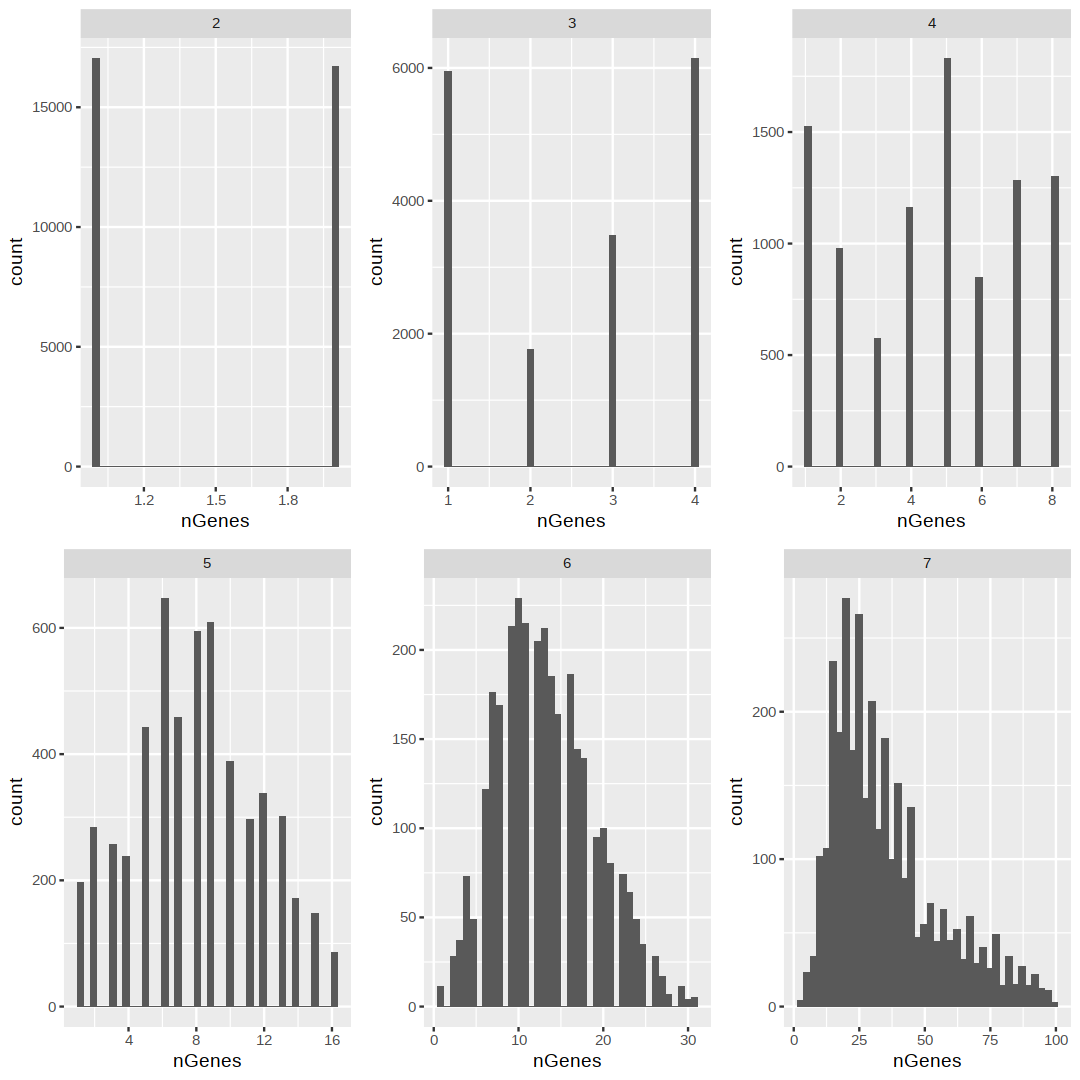

In [42]:
#### Anti-Correlation
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCor,length))

In [43]:
#### Consensus
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
table(sapply(genesCons,length))
length(genesCons)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    10    11    12    13 
86857  6908  1214   260    87    34    14    10     6     3     3     2     1 
   14    15    16    18    19    20    21    23    26    58 22792 
    2     2     1     2     1     1     1     1     1     1     1 

[1] 95413

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



     1      2      3      4      5      6      7      8      9     10     11 
100571  11833   2548    678    250    132     51     35     20      7      7 
    12     13     14     15     16     17     18     19     20     21     22 
     6      6      8      5      3      5      5      5      5      1      2 
    23     28     33     36     39     40     69     88  22792 
     4      1      1      1      1      1      1      1      1 

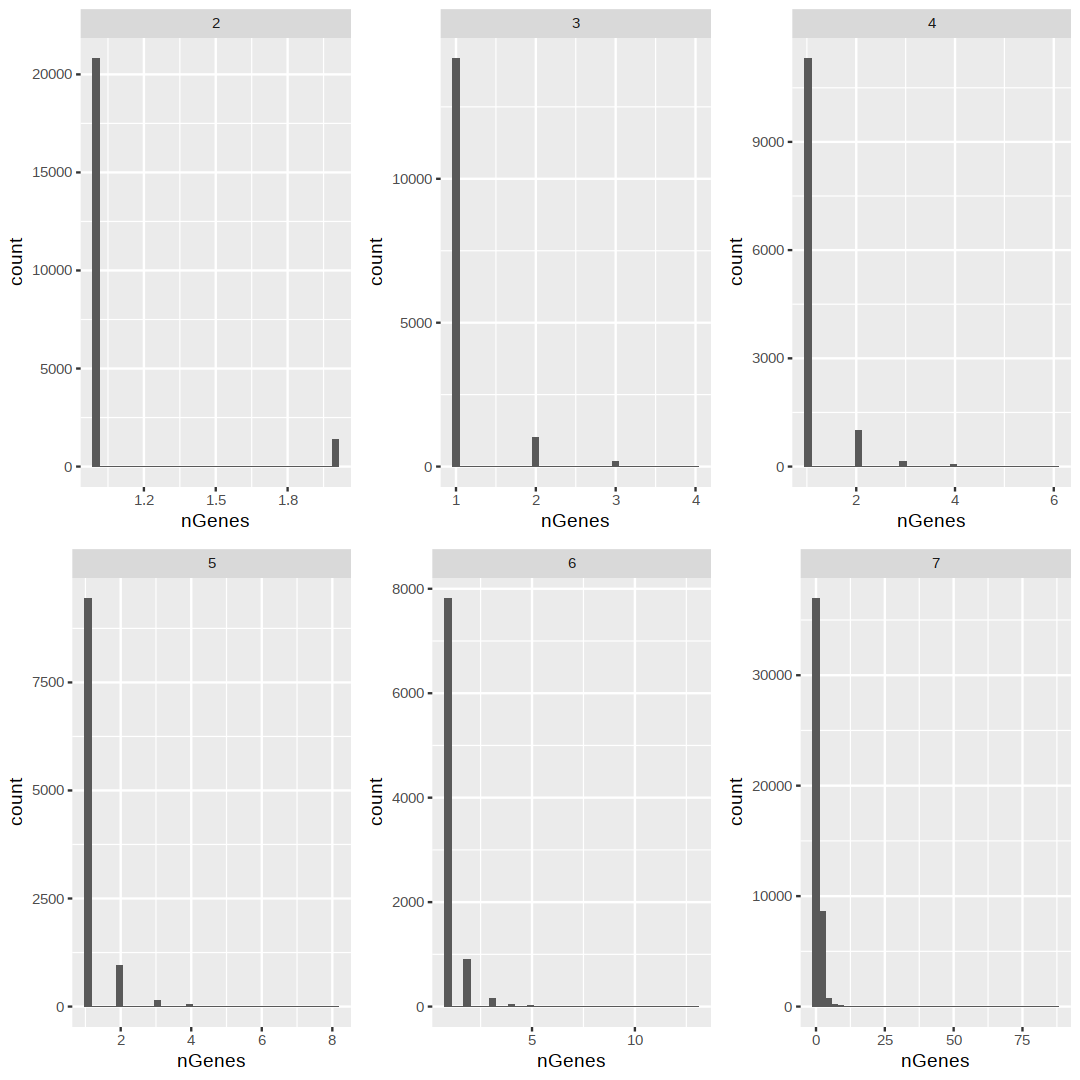

In [44]:
#### Consensus 0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCons0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    10    11    12    13 
99636 14030  3838  1070   434   270   134    71    73    56    36    26    28 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
   30    35    10    34    24    14    29     7    12    17     7    13     6 
   27    28    29 22792 
    2    11    12     1 

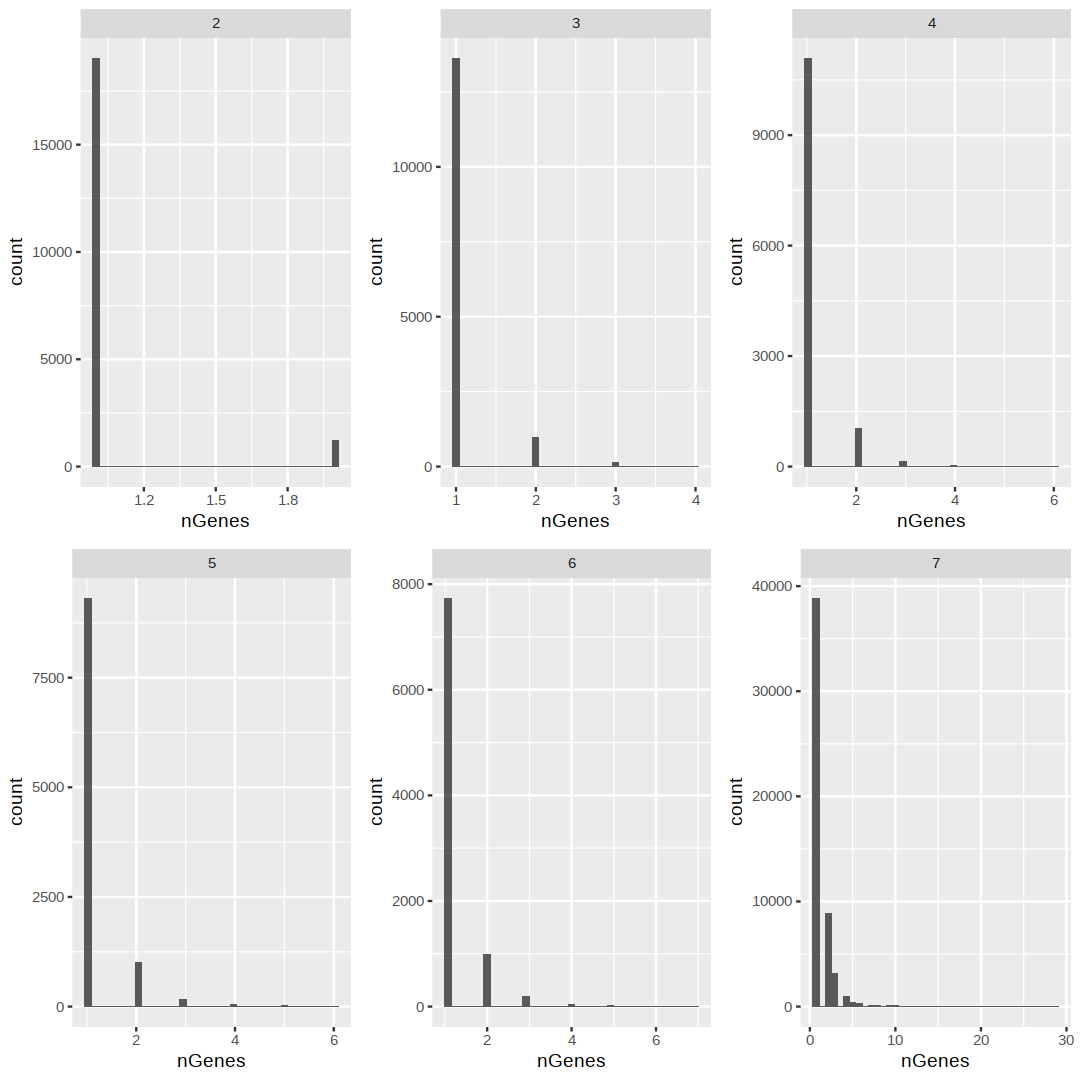

In [45]:
#### MeanInf0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesMeanInf0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7    10    11 22792 
16623   718    53    13     4     1     2     1     1     1 

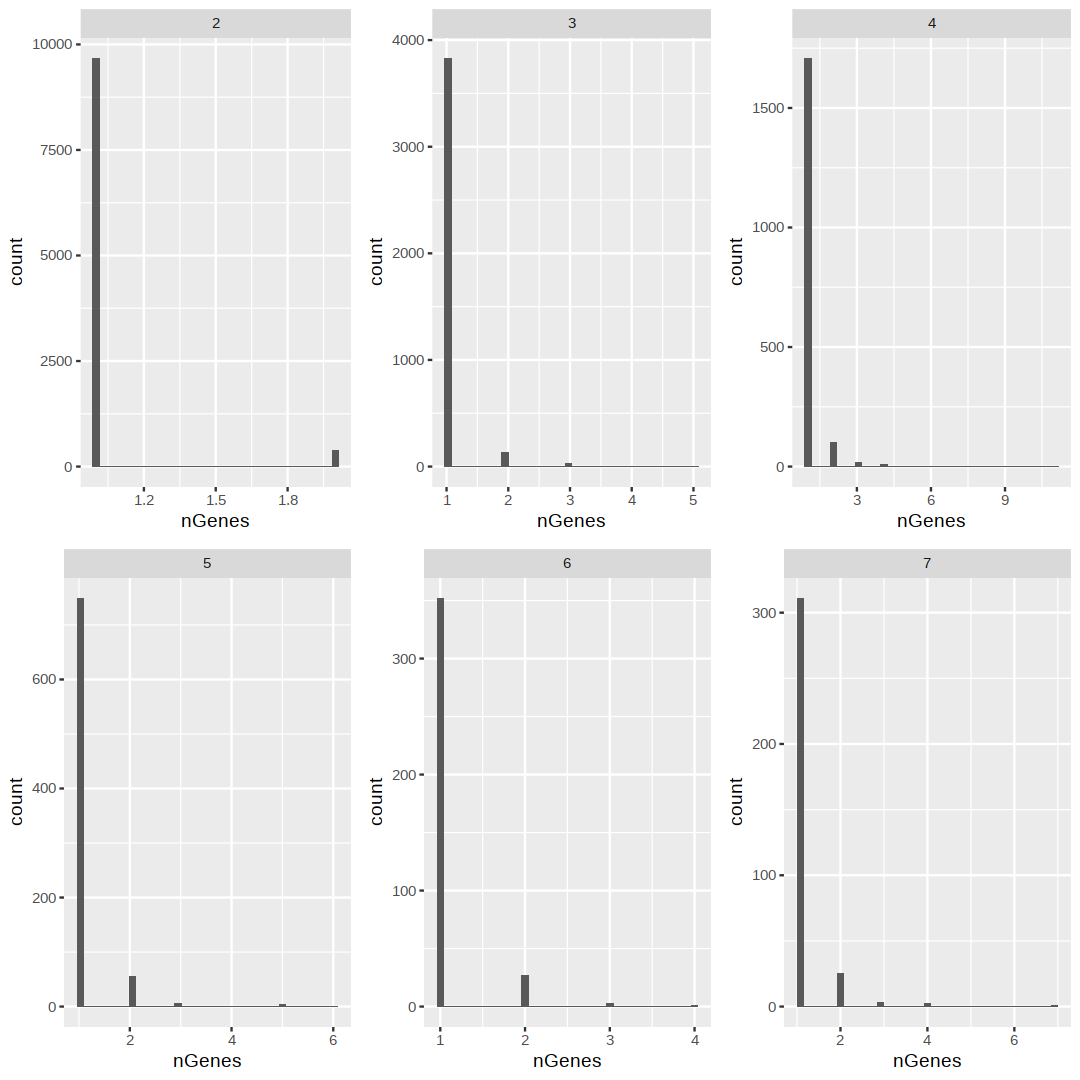

In [46]:
#### Cons Thr
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Cons_Thr" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Cons_Thr" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesThr,length))